In [1]:
import os
import fiona
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import geopandas as geopd

/home/claudinei/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Data Informations
All data shared from 
[CapitalBikeShare](https://www.capitalbikeshare.com/system-data)

## Tasks to make
- Identify the variables that most impact hourly ridership
- Develop a model to predict hourly bikeshare demand in the Greater Washington DC region based on historical ridership and weather data for next year
- Get a total of members and casual clients
- Explore how many clients use in normal work/study hour 6~9 12~14 18~20
- Get the most stations used
- Get the most bikes used by the time used


In [2]:
dataframe_stations_raw = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json', orient='values')

In [3]:
dataframe_stations = dataframe_stations_raw.copy()
dataframe_stations = pd.DataFrame(dataframe_stations.data.stations).set_index('station_id')
print('Stations Length: ',len(dataframe_stations))
dataframe_stations.head()

Length:  649


,region_id,eightd_station_services,station_type,eightd_has_key_dispenser,capacity,lat,rental_uris,has_kiosk,name,external_id,legacy_id,lon,rental_methods,electric_bike_surcharge_waiver,short_name
station_id,,,,,,,,,,,,,,,
1,41,[],classic,False,15,38.858971,{'android': 'https://dc.lft.to/lastmile_qr_sca...,True,Eads St & 15th St S,082469cc-1f3f-11e7-bf6b-3863bb334450,1,-77.053230,"[KEY, CREDITCARD]",False,31000
2,41,[],classic,False,11,38.857250,{'android': 'https://dc.lft.to/lastmile_qr_sca...,True,18th St & S Eads St,08246b69-1f3f-11e7-bf6b-3863bb334450,2,-77.053320,"[KEY, CREDITCARD]",False,31001
3,41,[],classic,False,17,38.856425,{'android': 'https://dc.lft.to/lastmile_qr_sca...,True,Crystal Dr & 20th St S,08246c35-1f3f-11e7-bf6b-3863bb334450,3,-77.049232,"[KEY, CREDITCARD]",False,31002
4,41,[],classic,False,16,38.861056,{'android': 'https://dc.lft.to/lastmile_qr_sca...,True,Crystal Dr & 15th St S,08246cd5-1f3f-11e7-bf6b-3863bb334450,4,-77.049417,"[KEY, CREDITCARD]",False,31003
5,41,[],classic,False,12,38.857866,{'android': 'https://dc.lft.to/lastmile_qr_sca...,True,Aurora Hills Cmty Ctr / 18th St & S Hayes St,08246d68-1f3f-11e7-bf6b-3863bb334450,5,-77.059490,"[KEY, CREDITCARD]",False,31004


In [4]:
dataframe_tripdata_raw = pd.read_csv('2016Q1-capitalbikeshare-tripdata.csv')
print('Raw Trip Length: ',len(dataframe_tripdata_raw))
dataframe_tripdata_raw.head()

Length:  552399


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


In [5]:
dataframe_tripdata = dataframe_tripdata_raw.copy()
print('Copy Trip Length: ',len(dataframe_tripdata))
dataframe_tripdata.head()

Length:  552399


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


### Total of clients by the type

In [6]:
dataframe_membertype = dataframe_tripdata.groupby('Member type')['Duration'].count().reset_index()
dataframe_membertype.rename(columns={'Duration':'Total'}, inplace=True)
dataframe_membertype.head()

,Member type,Total
0,Casual,84967
1,Member,467432


In [7]:
dataframe_casualclients = dataframe_tripdata[dataframe_tripdata['Member type'] == 'Casual']
print('Length: ',len(dataframe_casualclients))
dataframe_casualclients.head()

Length:  84967


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
5,859,2016-01-01 00:16:18,2016-01-01 00:30:37,31041,Prince St & Union St,31048,King St Metro South,W01122,Casual
11,278,2016-01-01 00:27:26,2016-01-01 00:32:05,31231,14th & D St NW / Ronald Reagan Building,31262,11th & F St NW,W00922,Casual
23,2018,2016-01-01 00:32:51,2016-01-01 01:06:30,31246,M St & Pennsylvania Ave NW,31513,Rhode Island Ave & V St NE,W22120,Casual
35,1285,2016-01-01 00:39:53,2016-01-01 01:01:18,31632,15th & F St NE,31632,15th & F St NE,W21072,Casual
39,1187,2016-01-01 00:43:49,2016-01-01 01:03:36,31258,Lincoln Memorial,31077,Iwo Jima Memorial/N Meade & 14th St N,W20562,Casual


In [8]:
dataframe_memberclients = dataframe_tripdata[dataframe_tripdata['Member type'] == 'Member']
print('Length: ',len(dataframe_memberclients))
dataframe_memberclients.head()

Length:  467432


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


In [9]:
dataframe_casual_by_station = dataframe_casualclients.groupby('Start station number')['Member type'].count().reset_index()
dataframe_casual_by_station.rename(columns={'Start station number':'station_id','Member type':'total'}, inplace=True)
print('Length: ',len(dataframe_casual_by_station))
dataframe_casual_by_station.head()

Length:  355


,station_id,total
0,31000,73
1,31001,75
2,31002,225
3,31003,199
4,31004,16


In [10]:
dataframe_member_by_station = dataframe_memberclients.groupby('Start station number')['Member type'].count().reset_index()
dataframe_member_by_station.rename(columns={'Start station number':'station_id','Member type':'total'}, inplace=True)
print('Length: ',len(dataframe_member_by_station))
dataframe_member_by_station.head()

Length:  370


,station_id,total
0,31000,226
1,31001,294
2,31002,695
3,31003,713
4,31004,657


## Morning Clients
6am ~ 9am

In [11]:
dataframe_morning_clients = dataframe_tripdata.copy()
dataframe_morning_clients['Start date'] = pd.to_datetime(dataframe_morning_clients['Start date'])
dataframe_morning_clients.set_index('Start date',inplace=True)
dataframe_morning_clients = dataframe_morning_clients.between_time('06:00:00','09:00:00')
print('Total Morning Clients: ',len(dataframe_morning_clients))
# dataframe_morning_clients.head()

Total Morning Clients:  95095


## Lunch Clients 
12am ~ 14pm

In [12]:
dataframe_lunch_clients = dataframe_tripdata.copy()
dataframe_lunch_clients['Start date'] = pd.to_datetime(dataframe_lunch_clients['Start date'])
dataframe_lunch_clients.set_index('Start date',inplace=True)
dataframe_lunch_clients = dataframe_lunch_clients.between_time('12:00:00','14:00:00')
print('Total LunchTime Clients: ',len(dataframe_lunch_clients))
# dataframe_lunch_clients.head()

Total LunchTime Clients:  61398


## Go Night Clients
18pm ~ 20pm

In [13]:
dataframe_night_clients = dataframe_tripdata.copy()
dataframe_night_clients['Start date'] = pd.to_datetime(dataframe_night_clients['Start date'])
dataframe_night_clients.set_index('Start date',inplace=True)
dataframe_night_clients = dataframe_night_clients.between_time('18:00:00','20:00:00')
print('Total Night Clients: ',len(dataframe_night_clients))
# dataframe_night_clients.head()

Total Night Clients:  85083


# Most used stations
top 10 stations

In [14]:
dataframe_sort_stations = dataframe_tripdata.groupby('Start station number')['Duration'].count().reset_index()
dataframe_sort_stations.rename(columns={'Start station number':'station_id', 'Duration':'Total'}, inplace=True)
dataframe_sort_stations.sort_values(by=['Total'],axis=0,ascending=False,inplace=True)
dataframe_sort_stations[:10]

,station_id,Total
274,31623,13120
123,31200,9560
180,31258,9388
169,31247,8138
163,31241,7479
124,31201,7401
101,31101,6568
151,31229,6491
264,31613,5649
136,31214,5514


# Most used bikes
top 10 of bikes

In [15]:
dataframe_sort_bikes = dataframe_tripdata.groupby('Bike number')['Duration'].count().reset_index()
dataframe_sort_bikes.rename(columns={'Bike number':'bike_id', 'Duration':'Total'}, inplace=True)
dataframe_sort_bikes.sort_values(by=['Total'],axis=0,ascending=False,inplace=True)
dataframe_sort_bikes[:10]

,bike_id,Total
3017,W21797,345
3400,W22227,337
2845,W21609,337
38,W00045,332
1694,W20384,328
1931,W20632,324
294,W00346,322
1561,W20242,322
2489,W21239,320
2440,W21186,320


## Time of use bike
Trying to find the total of used bikes
looks like it's in seconds

In [16]:
dataframe_time_used = dataframe_tripdata.groupby('Bike number')['Duration'].sum().reset_index()
dataframe_time_used.sort_values(by=['Duration'],axis=0,ascending=False,inplace=True)
dataframe_time_used

,Bike number,Duration
1273,W01410,386143
1436,W20098,384611
2503,W21253,368121
364,W00420,367593
2338,W21068,366573
...,...,...
2039,W20745,463
1492,W20162,344
820,W00919,262
283,W00335,251


# Time for plot the data
Distribution Subscriber Type

<AxesSubplot:ylabel='Member type'>

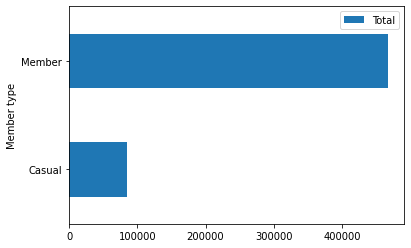

In [49]:
dataframe_membertype.plot.barh(x="Member type",y="Total")

## Import maps with GeoPandas
Search for Virginia USA

In [18]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
df = geopd.read_file(url)
map_virginia = df[df['diss_me'] == 3552]
map_virginia

,scalerank,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,adm0_sr,...,area_sqkm,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,featureclass,geometry
39,2,USA-3552,3552,USA-3552,US-VA,http://en.wikipedia.org/wiki/Virginia,US1,USA,US,6,...,0,-99,0,Admin-1 scale rank,United States of America,8,1,1,Admin-1 scale rank,"MULTIPOLYGON (((-75.37754 38.01538, -75.94003 ..."


<AxesSubplot:>

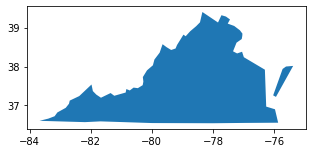

In [19]:
map_virginia.plot(figsize=(5, 5))